Question 17
---

In [2]:
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF

In [3]:
file_path = os.path.expanduser('../ml-latest-small/ratings.csv')
# reader = Reader(line_format = 'userId movieId rating timestamp', sep = '\t', skip_lines = 1)
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader = reader)

x = range(2, 51, 2)
avg_rmse = [0] * len(x)
avg_mae = [0] * len(x)
for k in x:
    algo = NMF(k)
    a = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 10)
    test_rmse = a['test_rmse']
    test_mae = a['test_mae']
    avg_rmse[int(k/2 -1)] = sum(test_rmse) / len(test_rmse)
    avg_mae[int(k/2 -1)] = sum(test_mae) / len(test_mae)
    print (int(k/2 -1))
    print (avg_rmse[int(k/2 -1)])
    print (avg_mae[int(k/2 -1)])

0
1.17423408412
0.993233530946
1
1.06702470943
0.877263486517
2
1.00889578173
0.811880573046
3
0.978251508503
0.775306246592
4
0.957428212351
0.749602839228
5
0.944299221081
0.731992663829
6
0.940649374902
0.724897718332
7
0.93803394387
0.719115214862
8
0.937463175333
0.714826385266
9
0.937619052153
0.713282107992
10
0.941291154478
0.712826462259
11
0.944041297288
0.713938707747
12
0.945596468135
0.714082001027
13
0.951171975825
0.717741649311
14
0.953697155143
0.718549783025
15
0.959648215399
0.722027961342
16
0.96261827047
0.723808034783
17
0.965802181518
0.726412228519
18
0.9709711037
0.729720666015
19
0.973379703291
0.731366097622
20
0.977580194849
0.734337688391
21
0.98107223751
0.73744835357
22
0.985028627817
0.738923288564
23
0.989696629159
0.743596025564
24
0.992268992824
0.745375992911


Question 18
---

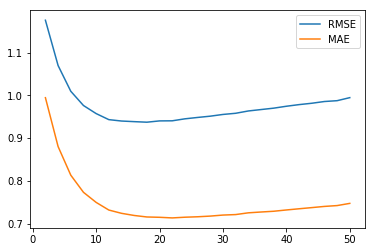

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, avg_rmse, label='RMSE')
plt.plot(x, avg_mae, label='MAE')
plt.legend()
plt.show()

Question 19
---

RMSE: 1.1750
RMSE: 1.1764
RMSE: 1.1739
RMSE: 1.1599
RMSE: 1.1768
RMSE: 1.1813
RMSE: 1.1749
RMSE: 1.1736
RMSE: 1.1773
RMSE: 1.1703
RMSE: 1.0636
RMSE: 1.0782
RMSE: 1.0705
RMSE: 1.0509
RMSE: 1.0700
RMSE: 1.0573
RMSE: 1.0651
RMSE: 1.0744
RMSE: 1.0803
RMSE: 1.0586
RMSE: 1.0075
RMSE: 1.0114
RMSE: 1.0136
RMSE: 1.0095
RMSE: 1.0093
RMSE: 1.0178
RMSE: 1.0128
RMSE: 1.0133
RMSE: 1.0024
RMSE: 1.0072
RMSE: 0.9688
RMSE: 0.9848
RMSE: 0.9714
RMSE: 0.9785
RMSE: 0.9618
RMSE: 0.9751
RMSE: 0.9758
RMSE: 0.9807
RMSE: 0.9822
RMSE: 0.9805
RMSE: 0.9482
RMSE: 0.9541
RMSE: 0.9596
RMSE: 0.9553
RMSE: 0.9497
RMSE: 0.9573
RMSE: 0.9794
RMSE: 0.9539
RMSE: 0.9367
RMSE: 0.9502
RMSE: 0.9402
RMSE: 0.9269
RMSE: 0.9532
RMSE: 0.9493
RMSE: 0.9493
RMSE: 0.9494
RMSE: 0.9362
RMSE: 0.9405
RMSE: 0.9547
RMSE: 0.9450
RMSE: 0.9345
RMSE: 0.9317
RMSE: 0.9356
RMSE: 0.9468
RMSE: 0.9241
RMSE: 0.9486
RMSE: 0.9442
RMSE: 0.9510
RMSE: 0.9335
RMSE: 0.9377
RMSE: 0.9449
RMSE: 0.9362
RMSE: 0.9280
RMSE: 0.9415
RMSE: 0.9384
RMSE: 0.9315
RMSE: 0.9458

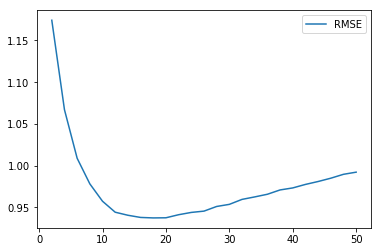

In [6]:
def trim(test_data, trim_condition = lambda x: x <= 2):
    movie_map = {}
    for i in test_data:
        movie = i[1]
        movie_map[movie] = 1 if(movie not in movie_map) else movie_map[movie] + 1
    for movie in movie_map:
        if trim_condition(movie_map[movie]):
            test_data = filter(lambda x: x[1] != movie, test_data)
    return test_data

from surprise.model_selection import KFold
from surprise import accuracy
import matplotlib.pyplot as plt
import numpy as np

x = range(2, 51, 2)

# the trim function is used to process the testset
# by default the trim function don't do anything
def knn_filter_trim(trim = lambda x : x):
    n_splits = 10
    kf = KFold(n_splits = n_splits)
    rmse_list = []
    for k in x:
        rmse = 0
        algo = NMF(k)
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset = trim(testset)
            prediction = algo.test(testset)
            rmse += accuracy.rmse(prediction)
        rmse_list.append(rmse / n_splits)
    return rmse_list

def plot_rmse(rmse_list):
    
    plt.plot(x, avg_rmse, label='RMSE')
    plt.legend()
    plt.show()
    
def trim_popular(test_data):
    return trim(test_data)
    
rmse_list_popular = knn_filter_trim(trim_popular)
plot_rmse(rmse_list_popular)


Question 20
---

RMSE: 1.1895
RMSE: 1.1687
RMSE: 1.1716
RMSE: 1.1649
RMSE: 1.1786
RMSE: 1.1769
RMSE: 1.1708
RMSE: 1.1858
RMSE: 1.1738
RMSE: 1.1724
RMSE: 1.0567
RMSE: 1.0757
RMSE: 1.0536
RMSE: 1.0649
RMSE: 1.0507
RMSE: 1.0767
RMSE: 1.0675
RMSE: 1.0843
RMSE: 1.0774
RMSE: 1.0623
RMSE: 1.0058
RMSE: 1.0164
RMSE: 1.0112
RMSE: 1.0103
RMSE: 1.0037
RMSE: 1.0013
RMSE: 1.0097
RMSE: 1.0113
RMSE: 1.0104
RMSE: 1.0060
RMSE: 0.9711
RMSE: 0.9784
RMSE: 0.9755
RMSE: 0.9909
RMSE: 0.9771
RMSE: 0.9632
RMSE: 0.9701
RMSE: 0.9855
RMSE: 0.9806
RMSE: 0.9772
RMSE: 0.9526
RMSE: 0.9575
RMSE: 0.9583
RMSE: 0.9517
RMSE: 0.9503
RMSE: 0.9452
RMSE: 0.9515
RMSE: 0.9553
RMSE: 0.9631
RMSE: 0.9603
RMSE: 0.9413
RMSE: 0.9465
RMSE: 0.9398
RMSE: 0.9539
RMSE: 0.9412
RMSE: 0.9432
RMSE: 0.9465
RMSE: 0.9370
RMSE: 0.9511
RMSE: 0.9419
RMSE: 0.9369
RMSE: 0.9348
RMSE: 0.9433
RMSE: 0.9283
RMSE: 0.9327
RMSE: 0.9354
RMSE: 0.9508
RMSE: 0.9356
RMSE: 0.9458
RMSE: 0.9411
RMSE: 0.9380
RMSE: 0.9480
RMSE: 0.9387
RMSE: 0.9343
RMSE: 0.9338
RMSE: 0.9367
RMSE: 0.9398

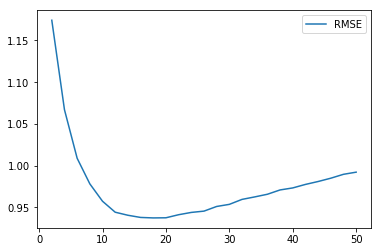

In [7]:
def trim_unpopular(test_data):
    return trim(test_data,trim_condition = lambda x: x > 2)
    
rmse_list_unpopular = knn_filter_trim(trim_unpopular)
plot_rmse(rmse_list_unpopular)

Question 21
---

RMSE: 1.1824
RMSE: 1.1779
RMSE: 1.1963
RMSE: 1.1661
RMSE: 1.1809
RMSE: 1.1825
RMSE: 1.1736
RMSE: 1.1812
RMSE: 1.1765
RMSE: 1.1703
RMSE: 1.0675
RMSE: 1.0630
RMSE: 1.0730
RMSE: 1.0704
RMSE: 1.0764
RMSE: 1.0641
RMSE: 1.0607
RMSE: 1.0721
RMSE: 1.0721
RMSE: 1.0622
RMSE: 1.0115
RMSE: 1.0079
RMSE: 1.0171
RMSE: 1.0094
RMSE: 1.0037
RMSE: 0.9978
RMSE: 1.0007
RMSE: 1.0178
RMSE: 1.0026
RMSE: 1.0195
RMSE: 0.9802
RMSE: 0.9841
RMSE: 0.9686
RMSE: 0.9616
RMSE: 0.9835
RMSE: 0.9758
RMSE: 0.9779
RMSE: 0.9757
RMSE: 0.9669
RMSE: 0.9805
RMSE: 0.9586
RMSE: 0.9578
RMSE: 0.9507
RMSE: 0.9476
RMSE: 0.9561
RMSE: 0.9603
RMSE: 0.9623
RMSE: 0.9573
RMSE: 0.9652
RMSE: 0.9690
RMSE: 0.9432
RMSE: 0.9303
RMSE: 0.9408
RMSE: 0.9471
RMSE: 0.9575
RMSE: 0.9514
RMSE: 0.9424
RMSE: 0.9527
RMSE: 0.9429
RMSE: 0.9467
RMSE: 0.9573
RMSE: 0.9434
RMSE: 0.9325
RMSE: 0.9411
RMSE: 0.9344
RMSE: 0.9404
RMSE: 0.9243
RMSE: 0.9350
RMSE: 0.9375
RMSE: 0.9479
RMSE: 0.9340
RMSE: 0.9334
RMSE: 0.9333
RMSE: 0.9335
RMSE: 0.9484
RMSE: 0.9453
RMSE: 0.9367

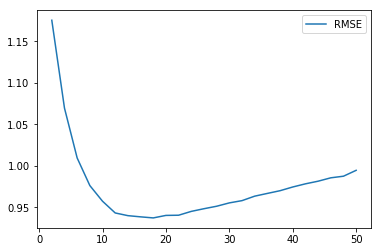

In [37]:
def trim_high_variance(test_data):
    movie_map = dict()
    for (user, movie, rate) in test_data:
        if (movie in movie_map):
            movie_map[movie].append(rate)
        else: 
            movie_map[movie] = [rate]
    for movie in movie_map:
        if len(movie_map[movie])<5 or np.var(np.array(movie_map[movie]))<2:
            test_data = filter(lambda x: x[1] != movie, test_data)
    return test_data

rmse_list_high_variance = knn_filter_trim(trim_high_variance)
plot_rmse(rmse_list_high_variance)  

Question 22
---

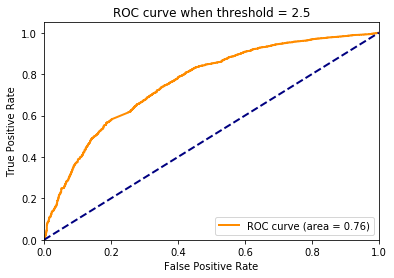

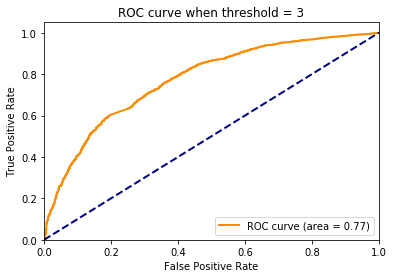

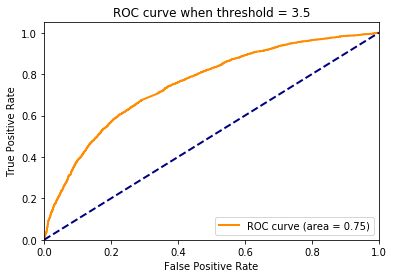

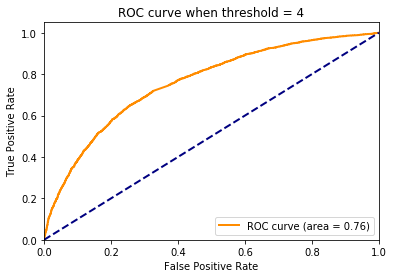

In [123]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.prediction_algorithms.matrix_factorization import NMF
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
import matplotlib.pyplot as plt

thresholds = [2.5, 3, 3.5, 4]
k = 18

trainset, testset = train_test_split(data, test_size = 0.1)
algo = NMF(k)
algo.fit(trainset)
predictions = algo.test(testset)

label_true = [x[2] for x in predictions]
label_esti = [x[3] for x in predictions]

for threshold in thresholds:
    binary_true = map(lambda x : 0 if x < threshold else 1, label_true)
    binary_true = np.fromiter(binary_true, dtype=np.int)
    fpr, tpr, _ = roc_curve(binary_true, label_esti)
    roc_auc = auc(fpr,tpr)
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve when threshold = ' + str(threshold))
    plt.legend(loc="lower right")
    plt.show()

Question 23
---

In [13]:
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
import numpy as np


file_path = os.path.expanduser('../ml-latest-small/ratings.csv')
# reader = Reader(line_format = 'userId movieId rating timestamp', sep = '\t', skip_lines = 1)
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader = reader)
from surprise.model_selection import train_test_split
trainset= data.build_full_trainset()
#movies_list = []
#for i in trainset:
    #movies_list.append(i[1])
    
algo = NMF(20, random_state=0)
algo.fit(trainset)
V = algo.qi
print(V.shape)
V_t = np.transpose(V)
movie_index = []
movie = []
b = []

a = np.argsort(V_t[2])
c = np.array(a[:10])
for j in c:
        movie_index.append(trainset.to_raw_iid(j))
    #movie_index.append(b)
print(movie_index)    

import csv
a = []
b = []
c = []
f = open('../ml-latest-small/movies.csv',encoding="utf8") 
spamreader = csv.reader(f)
for row in spamreader:
    a.append(row[0])
    b.append(row[1])   
    c.append(row[2])
f.close()
movies = []
a.pop(0)
b.pop(0)
c.pop(0)
#a = list(map(int, a))



index_list_0 = []
newlist = enumerate(a)
for index, item in newlist:
    for movie_id in movie_index:
        if item == movie_id:
            index_list_0.append(index)

genre = []
for i in index_list_0:
    genre.append(c[i])
print(genre)
   # if item in movie_index[0]:
            #print(movie_index[0])
            #print(index)




(9066, 20)
['6219', '4143', '4603', '2887', '6450', '5106', '6797', '33817', '6686', '4520']
['Action|Comedy', 'Horror|Mystery', 'Comedy', 'Comedy|Romance', 'Comedy|Musical|Romance', 'Action|Drama|Thriller', 'Drama|War', 'Action|Comedy|Crime|Fantasy', 'Crime|Drama', 'Drama|Romance']
